# **Import Module**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import warnings
import networkx as nx

pio.templates.default = "plotly_white"
warnings.filterwarnings('ignore')

# **Download Data**

In [22]:
!wget --no-check-certificate https://raw.githubusercontent.com/rioooranteai/data-analytics-modeling/main/Netflix%20Content%20Strategy%20Analysis/Dataset/netflix_content_2023.csv -O /content/netflix_content_2023.csv

--2025-03-03 09:13:29--  https://raw.githubusercontent.com/rioooranteai/data-analytics-modeling/main/Netflix%20Content%20Strategy%20Analysis/Dataset/netflix_content_2023.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1753104 (1.7M) [text/plain]
Saving to: ‘/content/netflix_content_2023.csv’

/content/netflix_co 100%[===================>]   1.67M  --.-KB/s    in 0.07s   

2025-03-03 09:13:30 (24.8 MB/s) - ‘/content/netflix_content_2023.csv’ saved [1753104/1753104]



# **Read Data**

In [23]:
df = pd.read_csv("/content/netflix_content_2023.csv")
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


# **EDA**

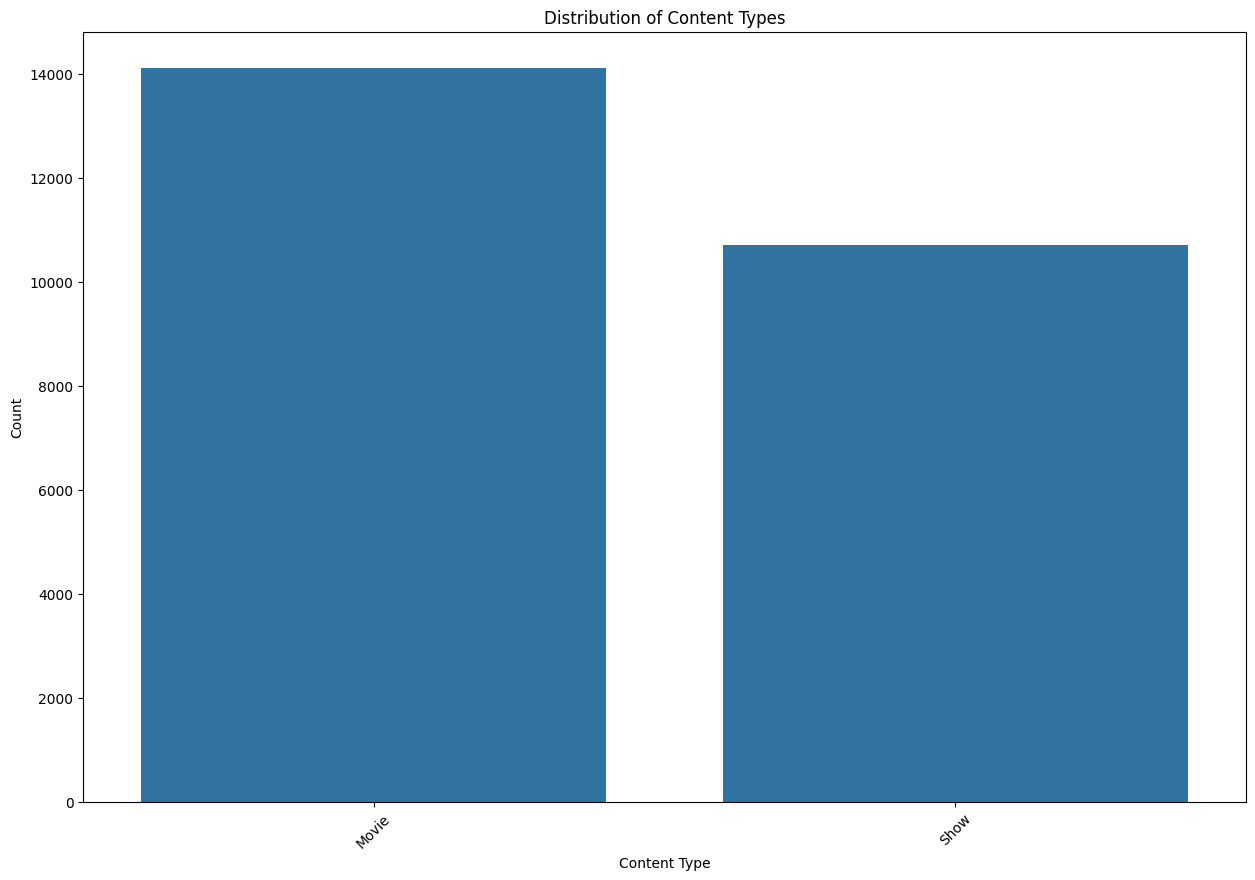

In [24]:
content_counts = df['Content Type'].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(x=content_counts.index, y=content_counts)
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Distribution of Content Types')
plt.xticks(rotation=45)
plt.show()

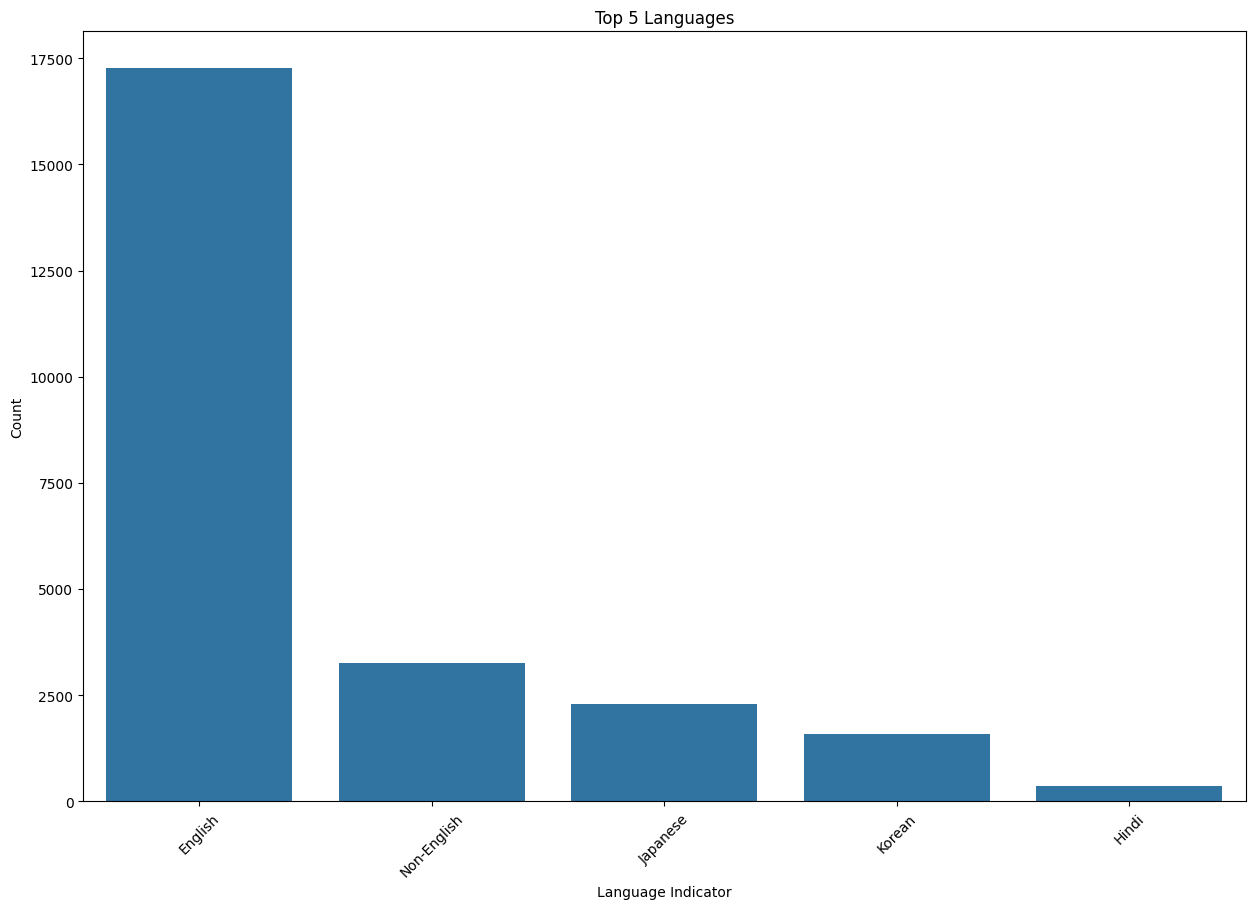

In [25]:
language_count = df['Language Indicator'].value_counts().head()
plt.figure(figsize=(15,10))
sns.barplot(x=language_count.index, y=language_count)
plt.xlabel('Language Indicator')
plt.ylabel('Count')
plt.title('Top 5 Languages')
plt.xticks(rotation=45)
plt.show()

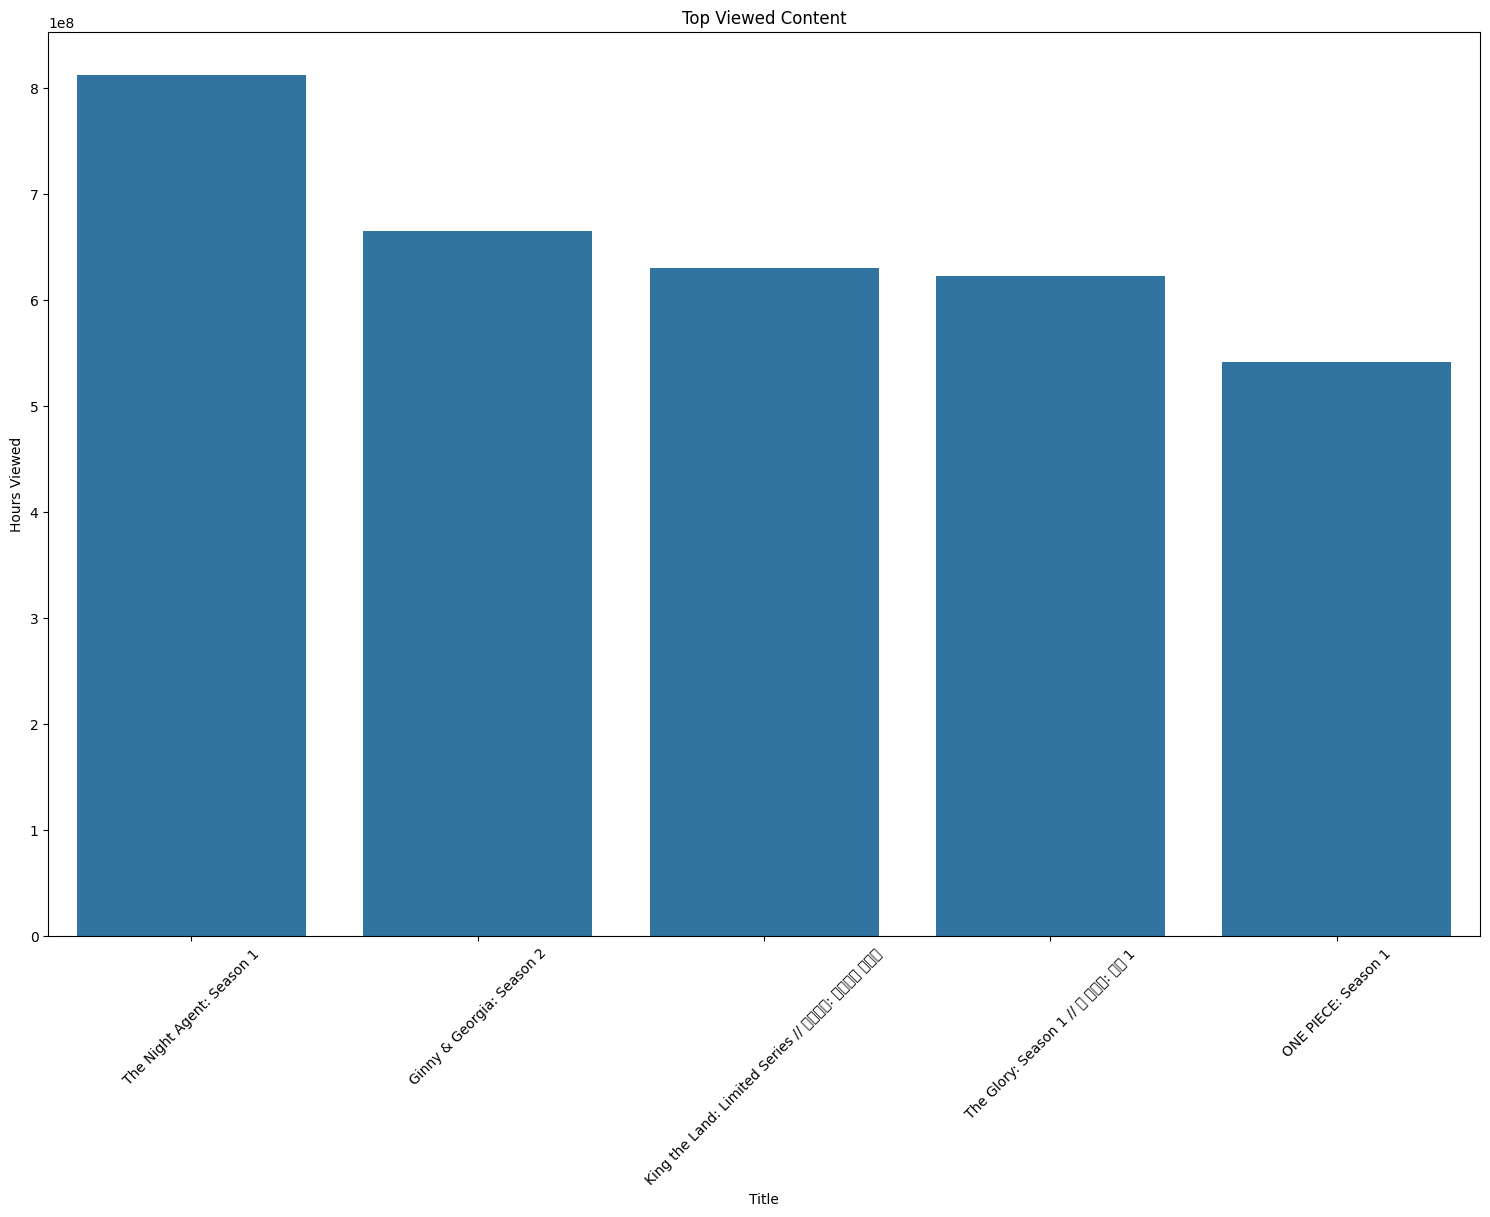

In [26]:
df['Hours Viewed'] = df['Hours Viewed'].replace(',', "", regex=True).astype(float)

top_viewed_content = df.sort_values('Hours Viewed', ascending=False).head()
plt.figure(figsize=(15,10))
sns.barplot(x='Title', y='Hours Viewed', data=top_viewed_content)
plt.xlabel('Title')
plt.ylabel('Hours Viewed')
plt.title('Top Viewed Content')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

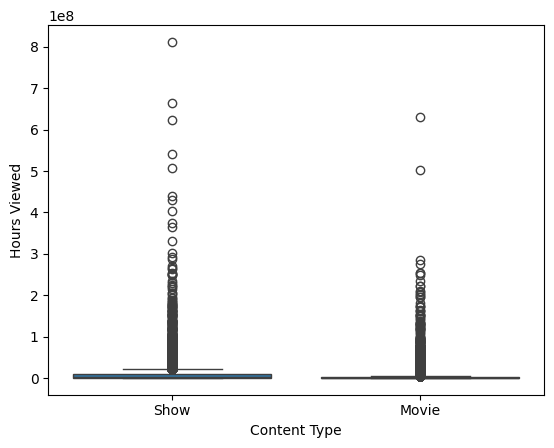

In [27]:
sns.boxplot(x='Content Type', y='Hours Viewed', data=df)
plt.xlabel('Content Type')
plt.ylabel('Hours Viewed')
plt.show()

In [31]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Release Year'] = df['Release Date'].dt.year
df['Release Month'] = df['Release Date'].dt.month
df['Release Day'] = df['Release Date'].dt.day

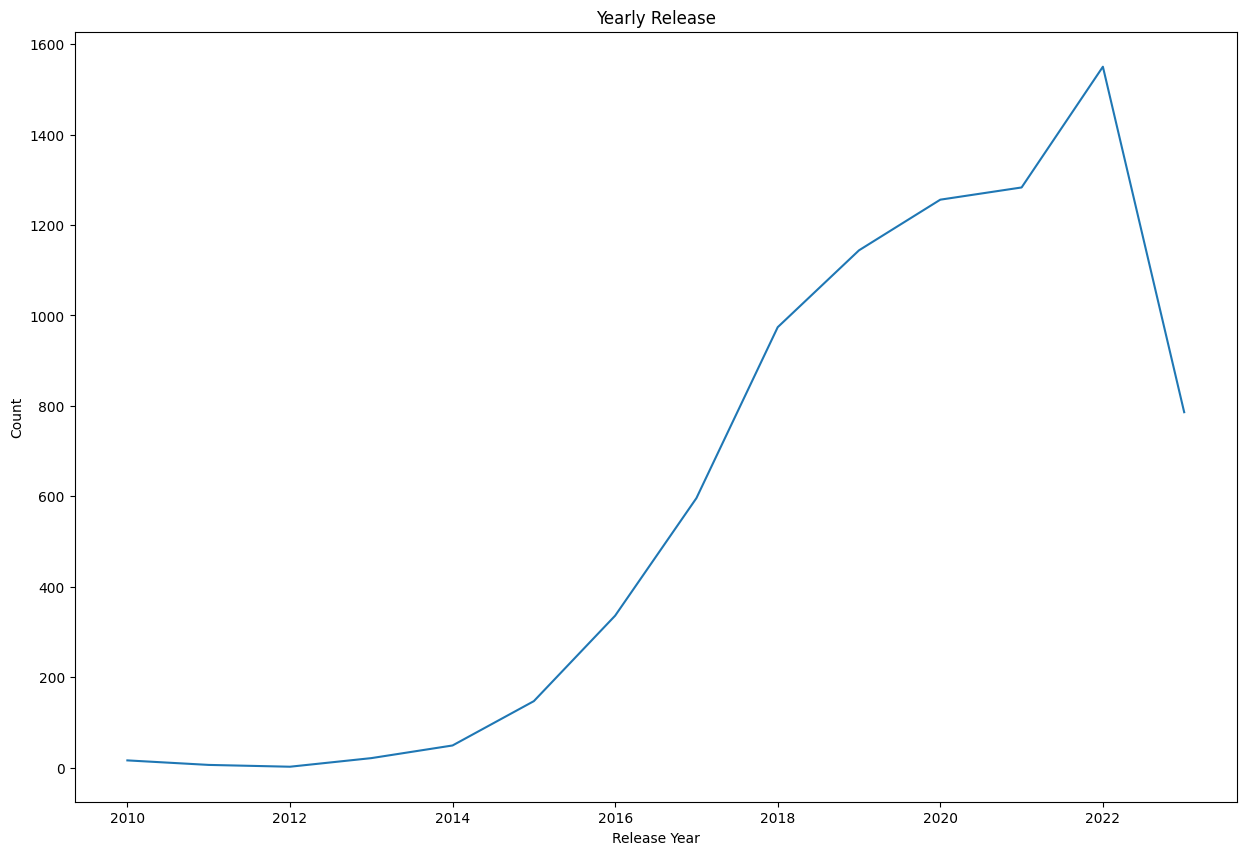

In [33]:
yearly_release = df.groupby('Release Year').size()
plt.figure(figsize=(15,10))
sns.lineplot(x=yearly_release.index, y=yearly_release)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Yearly Release')
plt.show()

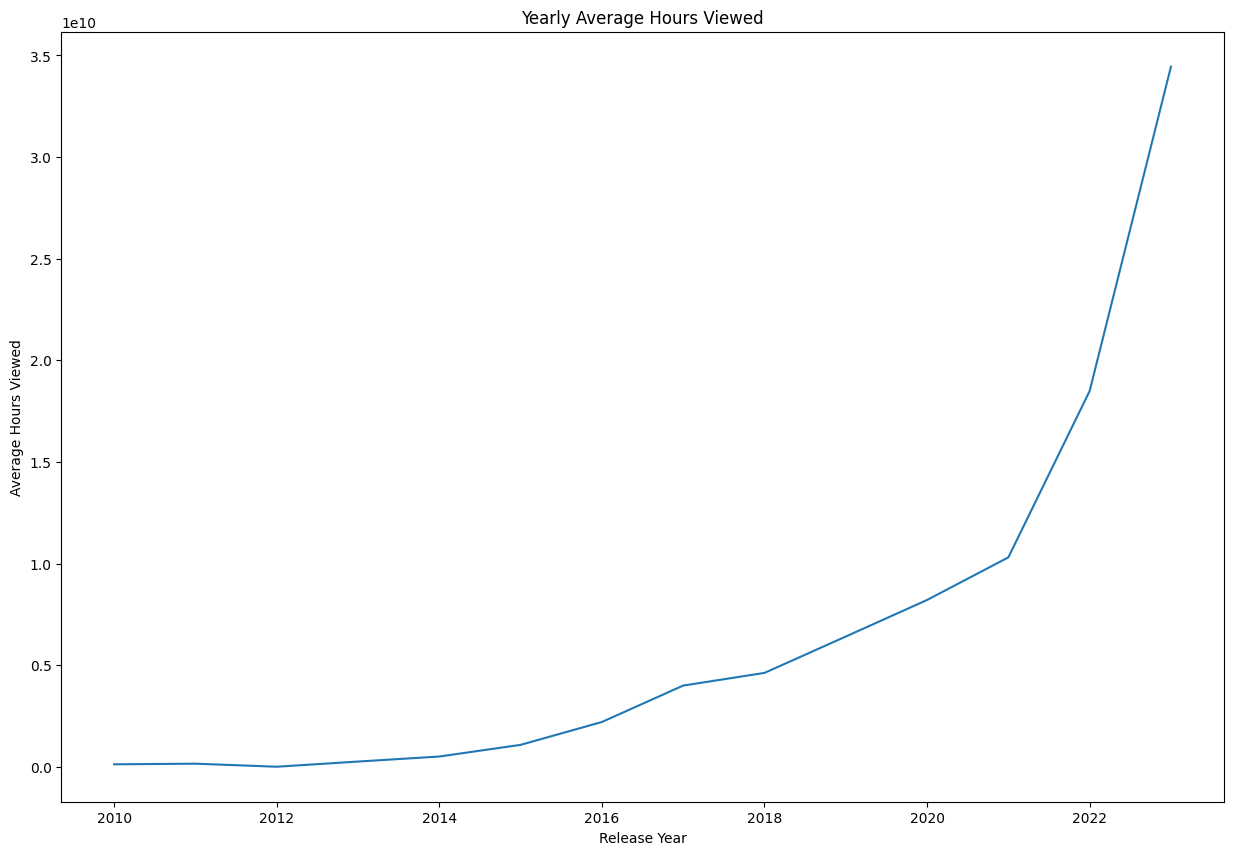

In [38]:
yearly_views = df.groupby('Release Year')['Hours Viewed'].sum()
plt.figure(figsize=(15,10))
sns.lineplot(x=yearly_views.index, y=yearly_views)
plt.xlabel('Release Year')
plt.ylabel('Average Hours Viewed')
plt.title('Yearly Average Hours Viewed')
plt.show()

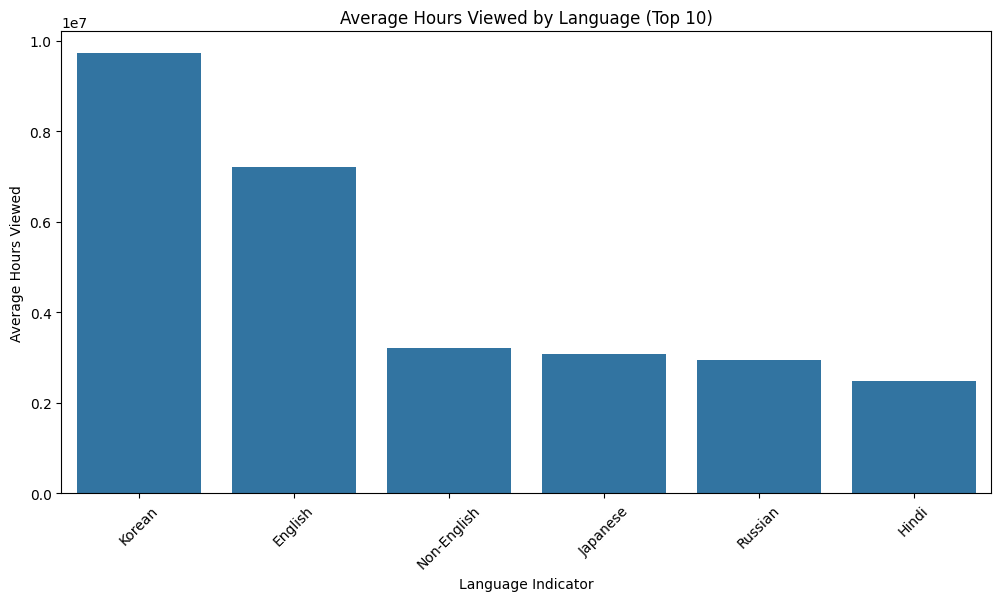

In [39]:
language_performance = df.groupby('Language Indicator')['Hours Viewed'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=language_performance.index, y=language_performance.values)
plt.title('Average Hours Viewed by Language (Top 10)')
plt.ylabel('Average Hours Viewed')
plt.xticks(rotation=45)
plt.show()

In [ ]:
G = nx.Graph()

threshold = 0.7

for idx, row in df.iterrows():
    G.add_node(row['Title'],
                   content_type=row['Content Type'],
                   language=row['Language Indicator'],
                   views=row['Hours Viewed'])

for i, row1 in df.iterrows():
    for j, row2 in df.iloc[i+1:].iterrows():
        similarity = 0
        if row1['Content Type'] == row2['Content Type']:
            similarity += 0.5
        if row1['Language Indicator'] == row2['Language Indicator']:
            similarity += 0.5

        if similarity >= threshold:
            G.add_edge(row1['Title'], row2['Title'], weight=similarity)

plt.figure(figsize=(15, 12))

content_types = df['Content Type'].unique()
color_map = {}
for i, content_type in enumerate(content_types):
    color_map[content_type] = plt.cm.tab10(i/len(content_types))

pos = nx.spring_layout(G, seed=42)

max_views = max(nx.get_node_attributes(G, 'views').values())
node_sizes = [300 * G.nodes[node]['views']/max_views for node in G.nodes()]

node_colors = [color_map[G.nodes[node]['content_type']] for node in G.nodes()]

nx.draw_networkx(G, pos,
                    node_size=node_sizes,
                    node_color=node_colors,
                    with_labels=True,
                    font_size=8,
                    alpha=0.7,
                    edge_color='gray')

legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                 markerfacecolor=color, markersize=10,
                                 label=content_type)
                      for content_type, color in color_map.items()]

plt.legend(handles=legend_elements, title='Content Type')
plt.title('Content Similarity Network')
plt.axis('off')